# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [20]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


In [21]:
training_data = np.load('TF_intro.npz')

In [22]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                          )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=custom_optimizer, loss='MeanSquaredError')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - 16ms/step - loss: 126.2130
Epoch 2/100
32/32 - 0s - 3ms/step - loss: 22.3147
Epoch 3/100
32/32 - 0s - 3ms/step - loss: 18.3246
Epoch 4/100
32/32 - 0s - 3ms/step - loss: 16.1565
Epoch 5/100
32/32 - 0s - 3ms/step - loss: 14.2533
Epoch 6/100
32/32 - 0s - 3ms/step - loss: 12.5834
Epoch 7/100
32/32 - 0s - 3ms/step - loss: 11.1150
Epoch 8/100
32/32 - 0s - 3ms/step - loss: 9.8088
Epoch 9/100
32/32 - 0s - 3ms/step - loss: 8.6672
Epoch 10/100
32/32 - 0s - 5ms/step - loss: 7.6781
Epoch 11/100
32/32 - 0s - 3ms/step - loss: 6.7797
Epoch 12/100
32/32 - 0s - 4ms/step - loss: 6.0030
Epoch 13/100
32/32 - 0s - 4ms/step - loss: 5.3269
Epoch 14/100
32/32 - 0s - 3ms/step - loss: 4.7324
Epoch 15/100
32/32 - 0s - 3ms/step - loss: 4.1937
Epoch 16/100
32/32 - 0s - 4ms/step - loss: 3.7315
Epoch 17/100
32/32 - 0s - 5ms/step - loss: 3.3256
Epoch 18/100
32/32 - 0s - 5ms/step - loss: 2.9664
Epoch 19/100
32/32 - 0s - 4ms/step - loss: 2.6443
Epoch 20/100
32/32 - 0s - 5ms/step - loss: 2.3761


In [23]:
model.layers[0].get_weights()

[array([[ 2.004816 ],
        [-2.9998853]], dtype=float32),
 array([4.977814], dtype=float32)]

In [24]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.004816 ],
       [-2.9998853]], dtype=float32)

In [25]:
bias = model.layers[0].get_weights()[1]
bias

array([4.977814], dtype=float32)

In [26]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  7. ],
       [  3.5],
       [-10. ],
       [-25.1],
       [ -4.6],
       [-15.2],
       [ 27.9],
       [ 15.9],
       [ 27.1],
       [ 25.6],
       [ 31.3],
       [ 27.3],
       [ 12.1],
       [-19.6],
       [ 28.9],
       [ -4.6],
       [ 16.1],
       [ -6.1],
       [ 48.1],
       [ -4.9],
       [  4. ],
       [-30.2],
       [ 26.6],
       [ 19.2],
       [-13.4],
       [ -5.1],
       [ 19.1],
       [ 15.2],
       [ 13.1],
       [  0.9],
       [-15.8],
       [-25.1],
       [ 17.8],
       [  8.9],
       [  6.8],
       [ 24.6],
       [ 17. ],
       [ 26.3],
       [ -3.4],
       [ 11.3],
       [  8. ],
       [ 15.3],
       [ -2.8],
       [ -5.4],
       [-24.1],
       [  7.1],
       [-34.1],
       [ 40.6],
       [ 17.7],
       [-11.1],
       [ 36.6],
       [ 17.3],
       [ 26.5],
       [ 17.4],
       [ -2.8],
       [-15.3],
       [  4.6],
       [ 23.4],
       [-31.1],
       [ 47. ],
       [ -1.1],
       [  8.9],
       [

In [27]:
training_data['targets'].round(1)

array([[  7.7],
       [  3.5],
       [-10.2],
       [-24.9],
       [ -4.9],
       [-16. ],
       [ 27. ],
       [ 16.7],
       [ 26.4],
       [ 26.6],
       [ 31.9],
       [ 28.2],
       [ 11.8],
       [-19.5],
       [ 29.8],
       [ -4.3],
       [ 15.9],
       [ -7. ],
       [ 47.3],
       [ -4.2],
       [  3. ],
       [-30.5],
       [ 26.6],
       [ 19.3],
       [-14. ],
       [ -5.9],
       [ 19.7],
       [ 14.9],
       [ 12.8],
       [  0.6],
       [-15. ],
       [-24.3],
       [ 18.6],
       [  8.7],
       [  6.4],
       [ 25.3],
       [ 17.7],
       [ 26. ],
       [ -2.7],
       [ 11.8],
       [  8.2],
       [ 15.8],
       [ -2.9],
       [ -5.4],
       [-24.2],
       [  7.3],
       [-34.1],
       [ 40.6],
       [ 17.6],
       [-10.5],
       [ 36. ],
       [ 18. ],
       [ 25.5],
       [ 16.6],
       [ -3.1],
       [-16.1],
       [  4.3],
       [ 23.2],
       [-30.9],
       [ 47.8],
       [ -1.8],
       [  9.8],
       [

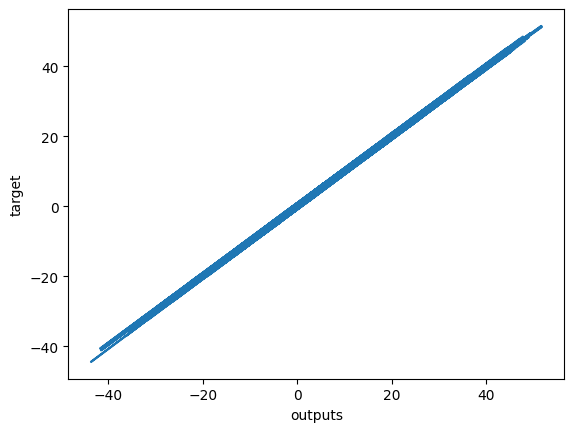

In [28]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('target')
plt.show()